Import

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import re


Read Data and Find Necessary Information

In [2]:


def extract_filtered_lines(url):
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        lines_list = []

        links = soup.find_all('a')

        for link in links:
            href = link.get('href')
            lines_list.append(href)

        filtered_lines = [line for line in lines_list
                          if line.startswith('/slimsdan/films/diary/for/')
                          or line.startswith('/slimsdan/film/')]

        return filtered_lines

    else:
        print(f"Failed to fetch the webpage. Status code: {response.status_code}")
        return None

urls = [
    'https://letterboxd.com/slimsdan/films/diary/page/1/',
    'https://letterboxd.com/slimsdan/films/diary/page/2/',
    'https://letterboxd.com/slimsdan/films/diary/page/3/',
    'https://letterboxd.com/slimsdan/films/diary/page/4/',
    'https://letterboxd.com/slimsdan/films/diary/page/5/'
]

all_filtered_lines = []
for url in urls:
    filtered_lines = extract_filtered_lines(url)
    if filtered_lines:
        all_filtered_lines.extend(filtered_lines)

if len(all_filtered_lines) >= 20:
    all_filtered_lines = all_filtered_lines[:-20]
else:
    print("Not enough lines to remove 20 lines.")

print("Filtered lines of film names and dates:")
for line in all_filtered_lines:
    print(line)


Filtered lines of film names and dates:
/slimsdan/films/diary/for/2023/
/slimsdan/films/diary/for/2022/
/slimsdan/films/diary/for/2021/
/slimsdan/films/diary/for/2020/
/slimsdan/films/diary/for/2023/12/
/slimsdan/films/diary/for/2023/
/slimsdan/films/diary/for/2023/12/03/
/slimsdan/film/the-holdovers/
/slimsdan/films/diary/for/2023/10/
/slimsdan/films/diary/for/2023/
/slimsdan/films/diary/for/2023/10/21/
/slimsdan/film/anatomy-of-a-fall/
/slimsdan/films/diary/for/2023/10/20/
/slimsdan/film/killers-of-the-flower-moon/
/slimsdan/films/diary/for/2023/10/19/
/slimsdan/film/the-blair-witch-project/
/slimsdan/films/diary/for/2023/10/14/
/slimsdan/film/midnight-cowboy/
/slimsdan/films/diary/for/2023/10/08/
/slimsdan/film/au-revoir-les-enfants/
/slimsdan/films/diary/for/2023/10/07/
/slimsdan/film/son-of-saul/
/slimsdan/films/diary/for/2023/10/07/
/slimsdan/film/about-dry-grasses/
/slimsdan/films/diary/for/2023/10/05/
/slimsdan/film/the-so-called-caryatids/
/slimsdan/films/diary/for/2023/10/02/

Create Dataframe of Movie Names and Dates 

In [3]:
movie_data = []
current_date = None

for line in all_filtered_lines:
    if line.startswith('/slimsdan/films/diary/for/'):
        match = re.search(r'\d{4}/\d{2}/\d{2}', line)
        if match:
            current_date = match.group()
    elif line.startswith('/slimsdan/film/'):
        parts = line.split('/')
        movie_name = next((p for p in parts[3:] if p and not p.isdigit()), None)
        if movie_name:
            movie_name = movie_name.replace('-', ' ')
            movie_data.append((movie_name, current_date))
            print(f"Line: {line}, Movie: {movie_name}, Watch Date: {current_date}")


df = pd.DataFrame(movie_data, columns=['Movie', 'Watch Date'])

print(df)

Line: /slimsdan/film/the-holdovers/, Movie: the holdovers, Watch Date: 2023/12/03
Line: /slimsdan/film/anatomy-of-a-fall/, Movie: anatomy of a fall, Watch Date: 2023/10/21
Line: /slimsdan/film/killers-of-the-flower-moon/, Movie: killers of the flower moon, Watch Date: 2023/10/20
Line: /slimsdan/film/the-blair-witch-project/, Movie: the blair witch project, Watch Date: 2023/10/19
Line: /slimsdan/film/midnight-cowboy/, Movie: midnight cowboy, Watch Date: 2023/10/14
Line: /slimsdan/film/au-revoir-les-enfants/, Movie: au revoir les enfants, Watch Date: 2023/10/08
Line: /slimsdan/film/son-of-saul/, Movie: son of saul, Watch Date: 2023/10/07
Line: /slimsdan/film/about-dry-grasses/, Movie: about dry grasses, Watch Date: 2023/10/07
Line: /slimsdan/film/the-so-called-caryatids/, Movie: the so called caryatids, Watch Date: 2023/10/05
Line: /slimsdan/film/tropic-thunder/, Movie: tropic thunder, Watch Date: 2023/10/02
Line: /slimsdan/film/poison-2023/, Movie: poison 2023, Watch Date: 2023/09/30
Li

Bar Chart of Number of Movies Watched per 7-Days

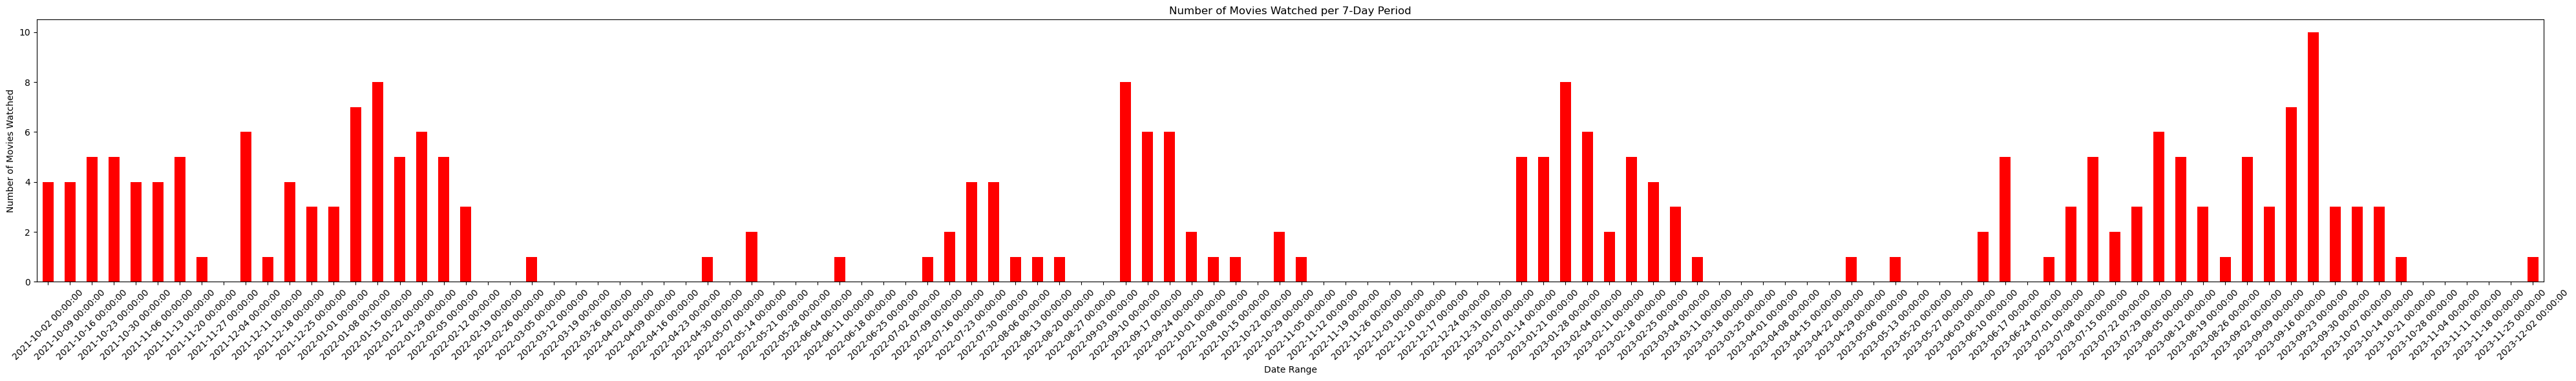

In [4]:
df['Watch Date'] = pd.to_datetime(df['Watch Date'])

start_date = '2021-10-02'
end_date = '2023-12-22'
filtered_data = df.loc[(df['Watch Date'] >= start_date) & (df['Watch Date'] <= end_date)]

movies_per_day = filtered_data.groupby('Watch Date').size()

movies_per_week = movies_per_day.resample('7D').sum()

plt.figure(figsize=(40, 6))
movies_per_week.plot(kind='bar', color='red')
plt.title('Number of Movies Watched per 7-Day Period')
plt.xlabel('Date Range')
plt.ylabel('Number of Movies Watched')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Graphs for Specific Periods

In [5]:
df['Watch Date'] = pd.to_datetime(df['Watch Date'])

date_ranges = [
    ('2021-10-02', '2021-12-26'),
    ('2021-12-27', '2022-01-04'),
    ('2022-01-05', '2022-01-21'),
    ('2022-01-22', '2022-02-06'),
    ('2022-02-07', '2022-02-27'),
    ('2022-02-28', '2022-06-10'),
    ('2022-06-11', '2022-06-23'),
    ('2022-06-24', '2022-07-22'),
    ('2022-07-23', '2022-08-10'),
    ('2022-08-11', '2022-09-08'),
    ('2022-09-09', '2022-10-02'),
    ('2022-10-03', '2023-01-06'),
    ('2023-01-07', '2023-01-14'),
    ('2023-01-15', '2023-01-26'),
    ('2023-01-27', '2023-02-26'),
    ('2023-02-26', '2023-05-31'),
    ('2023-06-01', '2023-06-11'),
    ('2023-06-12', '2023-06-21'),
    ('2023-06-22', '2023-07-30'),
    ('2023-07-31', '2023-08-14'),
    ('2023-08-15', '2023-08-30'),
    ('2023-08-31', '2023-10-01'),
    ('2023-10-02', '2023-12-22')
]

results = []
for start_date, end_date in date_ranges:
    filtered_data = df.loc[(df['Watch Date'] >= start_date) & (df['Watch Date'] <= end_date)]
    
    total_movies_watched = len(filtered_data)
    
    num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1
    movies_per_day = total_movies_watched / num_days if num_days != 0 else 0

    results.append({
        'Date Range': f'{start_date} to {end_date}',
        'Total Movies Watched': total_movies_watched,
        'Movies Watched per Day': movies_per_day
    })

results_df = pd.DataFrame(results)

print(results_df)

                  Date Range  Total Movies Watched  Movies Watched per Day
0   2021-10-02 to 2021-12-26                    46                0.534884
1   2021-12-27 to 2022-01-04                     0                0.000000
2   2022-01-05 to 2022-01-21                    18                1.058824
3   2022-01-22 to 2022-02-06                    13                0.812500
4   2022-02-07 to 2022-02-27                     6                0.285714
5   2022-02-28 to 2022-06-10                     4                0.038835
6   2022-06-11 to 2022-06-23                     1                0.076923
7   2022-06-24 to 2022-07-22                     3                0.103448
8   2022-07-23 to 2022-08-10                     9                0.473684
9   2022-08-11 to 2022-09-08                     2                0.068966
10  2022-09-09 to 2022-10-02                    20                0.833333
11  2022-10-03 to 2023-01-06                     7                0.072917
12  2023-01-07 to 2023-01

Avg. Movies per Day for Date Ranges

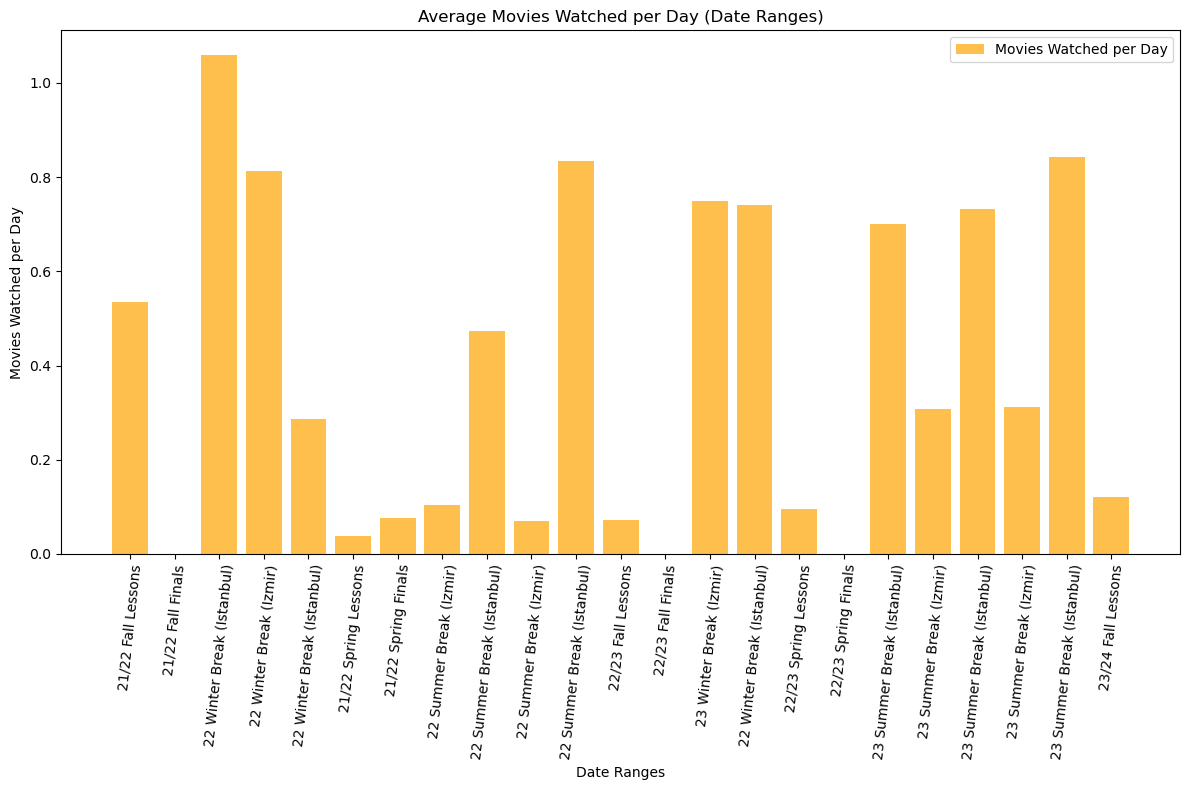

In [6]:
# Descriptions of Date Ranges
custom_names = [
    "21/22 Fall Lessons",
    "21/22 Fall Finals",
    "22 Winter Break (Istanbul)",
    "22 Winter Break (Izmir)",
    "22 Winter Break (Istanbul)",
    "21/22 Spring Lessons",
    "21/22 Spring Finals",
    "22 Summer Break (Izmir)",
    "22 Summer Break (Istanbul)",
    "22 Summer Break (Izmir)",
    "22 Summer Break (Istanbul)",
    "22/23 Fall Lessons",
    "22/23 Fall Finals",
    "23 Winter Break (Izmir)",
    "22 Winter Break (Istanbul)",
    "22/23 Spring Lessons",
    "22/23 Spring Finals",
    "23 Summer Break (Istanbul)",
    "23 Summer Break (Izmir)",
    "23 Summer Break (Istanbul)",
    "23 Summer Break (Izmir)",
    "23 Summer Break (Istanbul)",
    "23/24 Fall Lessons",
]

plt.figure(figsize=(12, 8))

plt.bar(range(len(results_df)), results_df['Movies Watched per Day'], color='orange', alpha=0.7, label='Movies Watched per Day')

plt.title('Average Movies Watched per Day (Date Ranges)')
plt.xlabel('Date Ranges')
plt.ylabel('Movies Watched per Day')

plt.xticks(range(len(results_df)), custom_names, rotation=84)  # Setting custom x-axis labels

plt.legend()
plt.tight_layout()

plt.show()

Find Movie Lengths

In [7]:
base_url = 'https://letterboxd.com/film/'


def format_movie_url(movie_name):
    
    formatted_name = movie_name.lower().replace(' ', '-')
    return base_url + formatted_name + '/'


movies_and_urls = [(movie, format_movie_url(movie)) for movie in df['Movie']]


for movie, url in movies_and_urls:
    print(f"Movie: {movie}, URL: {url}")

Movie: the holdovers, URL: https://letterboxd.com/film/the-holdovers/
Movie: anatomy of a fall, URL: https://letterboxd.com/film/anatomy-of-a-fall/
Movie: killers of the flower moon, URL: https://letterboxd.com/film/killers-of-the-flower-moon/
Movie: the blair witch project, URL: https://letterboxd.com/film/the-blair-witch-project/
Movie: midnight cowboy, URL: https://letterboxd.com/film/midnight-cowboy/
Movie: au revoir les enfants, URL: https://letterboxd.com/film/au-revoir-les-enfants/
Movie: son of saul, URL: https://letterboxd.com/film/son-of-saul/
Movie: about dry grasses, URL: https://letterboxd.com/film/about-dry-grasses/
Movie: the so called caryatids, URL: https://letterboxd.com/film/the-so-called-caryatids/
Movie: tropic thunder, URL: https://letterboxd.com/film/tropic-thunder/
Movie: poison 2023, URL: https://letterboxd.com/film/poison-2023/
Movie: the rat catcher 2023, URL: https://letterboxd.com/film/the-rat-catcher-2023/
Movie: the swan 2023, URL: https://letterboxd.com/

In [8]:
def scrape_movie_length(movie_url):
    response = requests.get(movie_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        length_element = soup.find('p', class_='text-link text-footer')
        if length_element:
            length_text = length_element.get_text(strip=True)
            length = ''.join(filter(str.isdigit, length_text))
            return int(length) if length else None
    return None


movie_lengths = []
number = 1

for movie, url in movies_and_urls:
    length = scrape_movie_length(url)
   
    movie_lengths.append((movie, length))


df_movie_lengths = pd.DataFrame(movie_lengths, columns=['Movie', 'Length_Minutes'])


print(df_movie_lengths)

                          Movie  Length_Minutes
0                 the holdovers             133
1             anatomy of a fall             152
2    killers of the flower moon             206
3       the blair witch project              81
4               midnight cowboy             113
..                          ...             ...
237                   incendies             131
238             taste of cherry              99
239         no time to die 2021             163
240     raiders of the lost ark             115
241             children of men             109

[242 rows x 2 columns]


Merge Date and Length of Movies

In [9]:
merged_df = pd.merge(df, df_movie_lengths, on='Movie', how='inner')

print(merged_df)

movie_counts = merged_df.groupby('Movie').size()

duplicated_movies = movie_counts[movie_counts > 1]

movies_more_than_once = duplicated_movies.index.tolist()

print("Movies that appear more than once:")
print(movies_more_than_once)

                          Movie Watch Date  Length_Minutes
0                 the holdovers 2023-12-03             133
1             anatomy of a fall 2023-10-21             152
2    killers of the flower moon 2023-10-20             206
3       the blair witch project 2023-10-19              81
4               midnight cowboy 2023-10-14             113
..                          ...        ...             ...
249                   incendies 2021-10-09             131
250             taste of cherry 2021-10-06              99
251         no time to die 2021 2021-10-04             163
252     raiders of the lost ark 2021-10-03             115
253             children of men 2021-10-02             109

[254 rows x 3 columns]
Movies that appear more than once:
['drive 2011', 'fantastic mr fox', 'the darjeeling limited', 'the french dispatch', 'the grand budapest hotel', 'the royal tenenbaums']


 Total Minutes Watched for 10-Day Periods

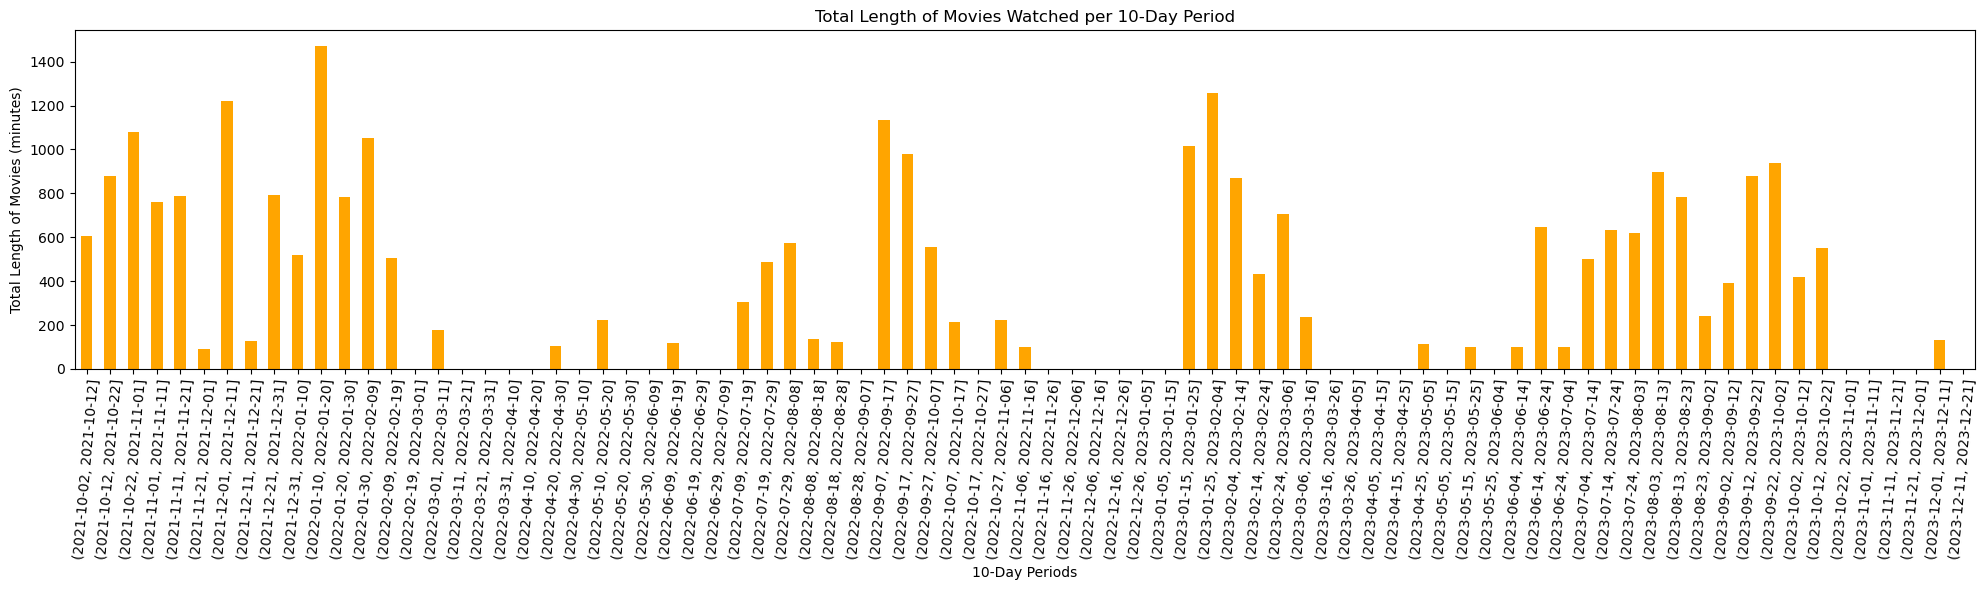

In [10]:
merged_df['Watch Date'] = pd.to_datetime(merged_df['Watch Date'])

start_date = '2021-10-02'
end_date = '2023-12-22'

date_range = pd.date_range(start=start_date, end=end_date, freq='10D')

length_per_period = merged_df.groupby(pd.cut(merged_df['Watch Date'], bins=date_range))['Length_Minutes'].sum()

plt.figure(figsize=(20, 6))
length_per_period.plot(kind='bar', color='orange')
plt.title('Total Length of Movies Watched per 10-Day Period')
plt.xlabel('10-Day Periods')
plt.ylabel('Total Length of Movies (minutes)')
plt.xticks(rotation=85)
plt.tight_layout()
plt.show()

Total Minutes Watched for Specific Periods

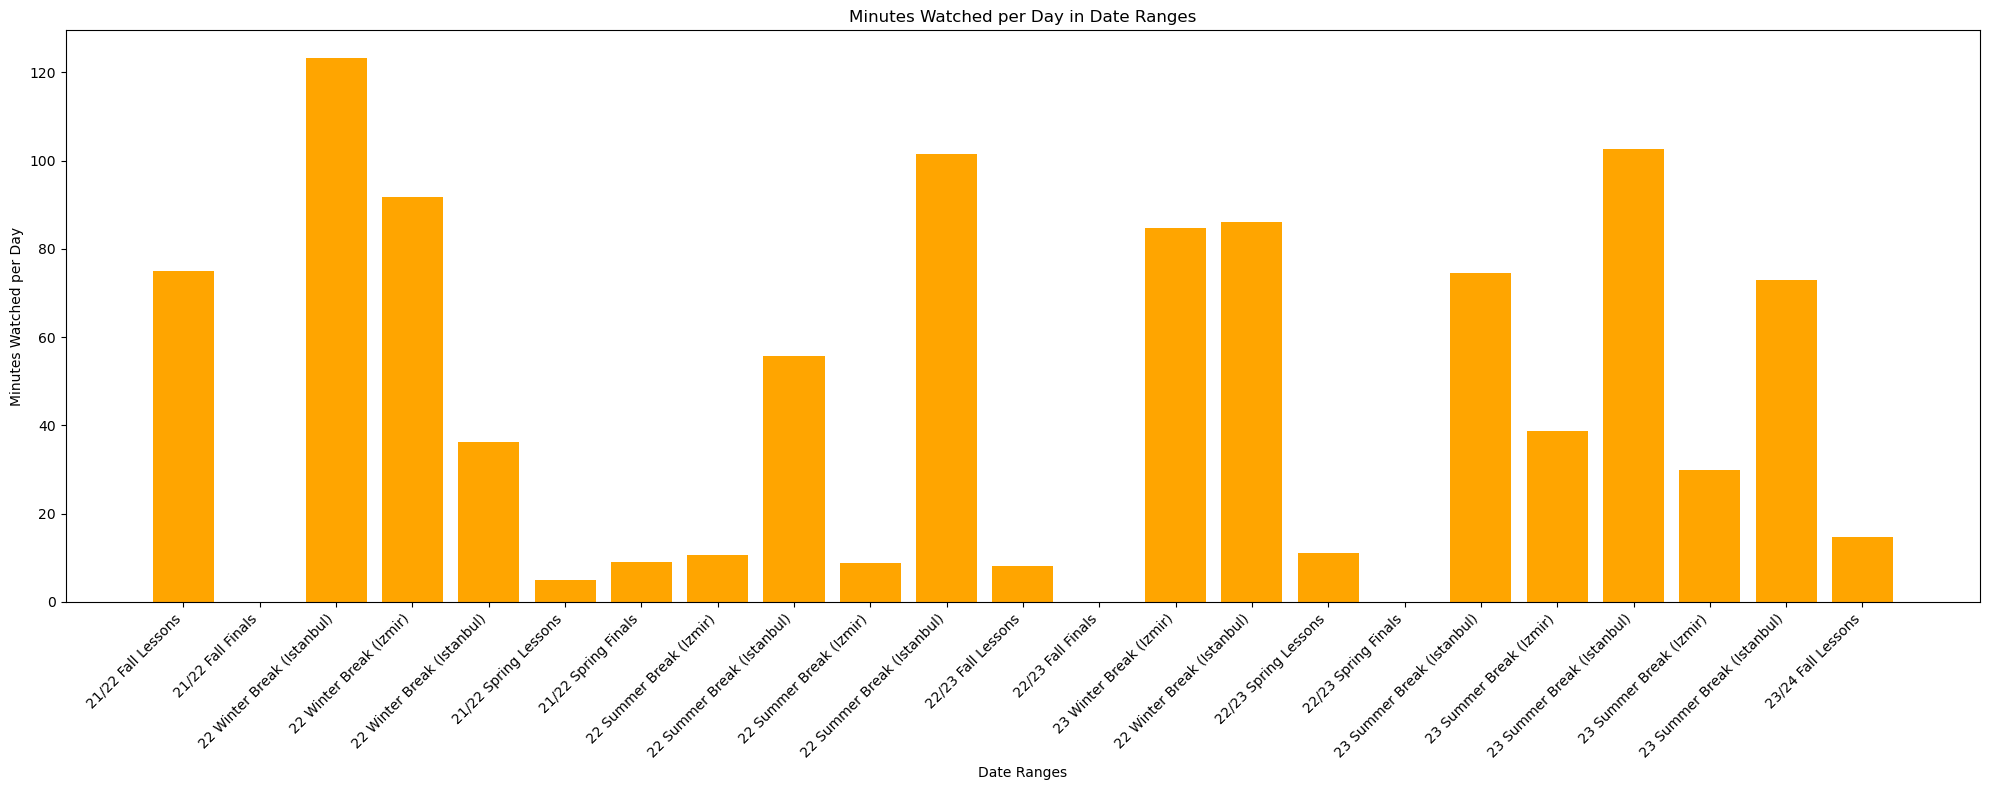

In [11]:
minutes_per_day_per_range = []

for start_date, end_date in date_ranges:
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)

    filtered_data = merged_df.loc[(merged_df['Watch Date'] >= start) & (merged_df['Watch Date'] <= end)]
    
    total_minutes = filtered_data['Length_Minutes'].sum()
    days_count = (end - start).days + 1
    
    if days_count > 0:
        minutes_per_day = total_minutes / days_count
    else:
        minutes_per_day = 0
    
    minutes_per_day_per_range.append(minutes_per_day)

plt.figure(figsize=(20, 8))
plt.bar(range(len(date_ranges)), minutes_per_day_per_range, color='orange')
plt.title('Minutes Watched per Day in Date Ranges')
plt.xlabel('Date Ranges')
plt.ylabel('Minutes Watched per Day')
plt.xticks(range(len(date_ranges)), custom_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Avg. Movie Length for Specific Periods

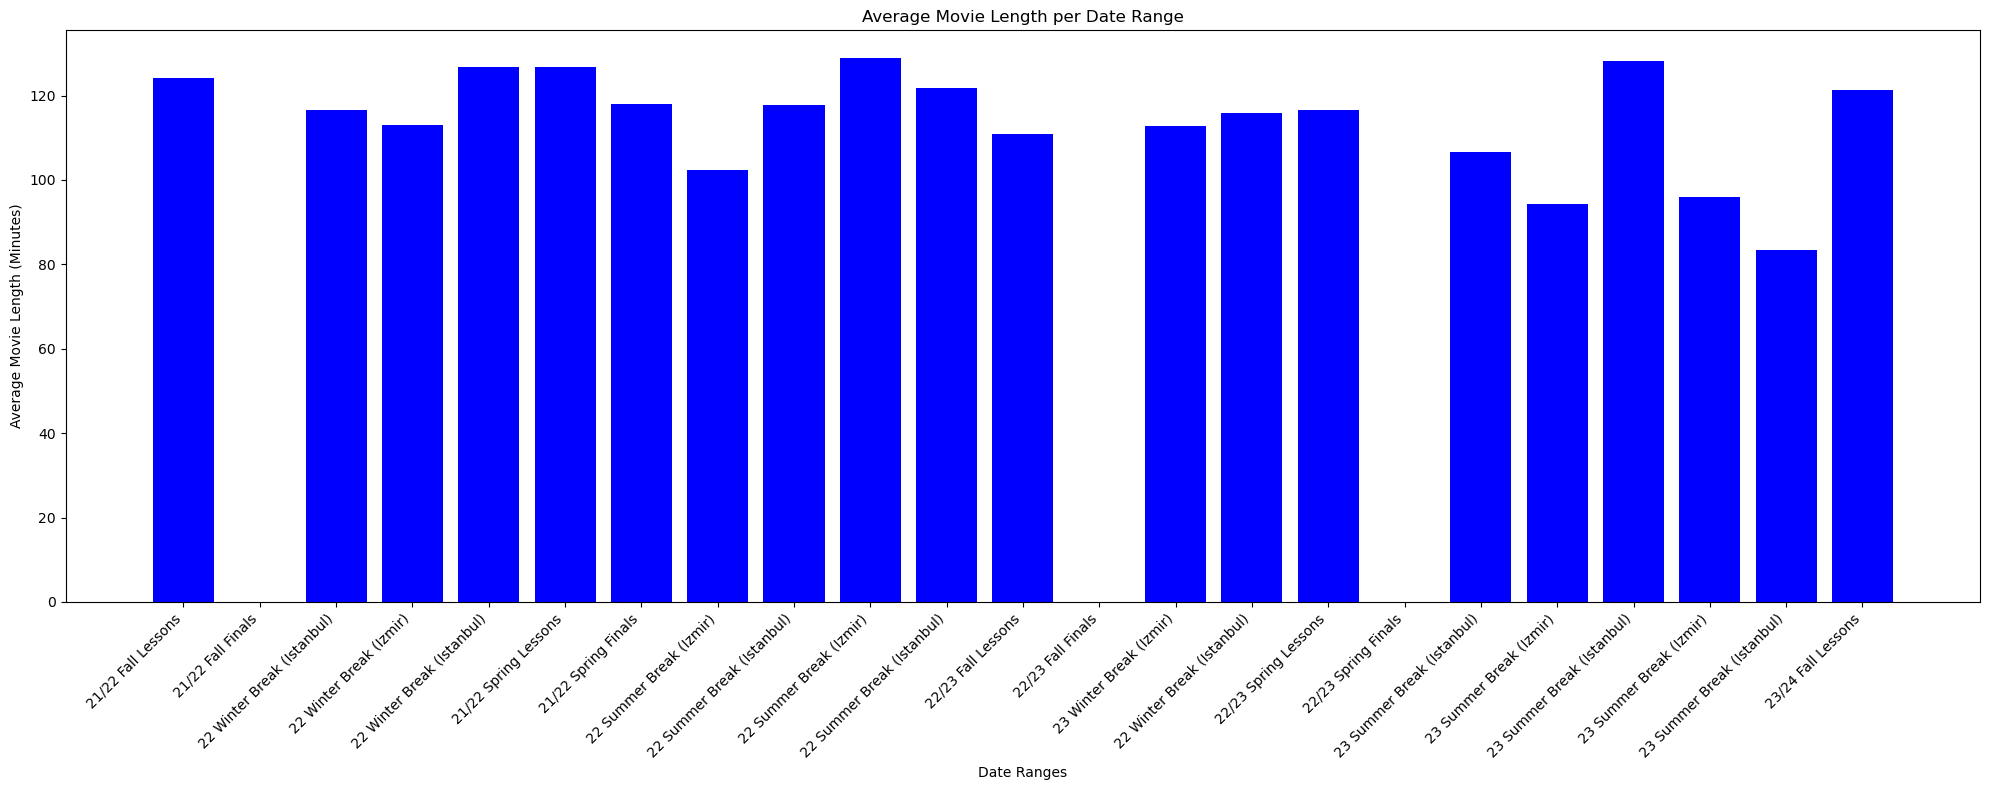

In [12]:
avg_length_per_range = []

for i in range(len(date_ranges)):
    start_date, end_date = date_ranges[i]
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    filtered_data = merged_df.loc[(merged_df['Watch Date'] >= start) & (merged_df['Watch Date'] <= end)]
    
    total_minutes = filtered_data['Length_Minutes'].sum()
    total_movies = filtered_data.shape[0]

    if total_movies > 0:
        avg_length = total_minutes / total_movies
    else:
        avg_length = 0
    
    avg_length_per_range.append(avg_length)

plt.figure(figsize=(20, 8))
plt.bar(range(len(date_ranges)), avg_length_per_range, color='blue')
plt.title('Average Movie Length per Date Range')
plt.xlabel('Date Ranges')
plt.ylabel('Average Movie Length (Minutes)')
plt.xticks(range(len(date_ranges)), custom_names, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comparison of Minutes Watched per Day in Istanbul and Izmir during Holidays

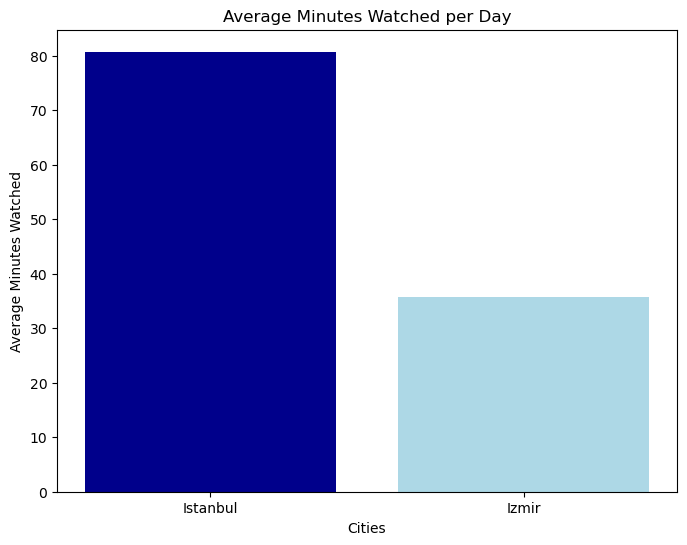

In [13]:
total_days_istanbul = 0
total_days_izmir = 0

for (start_date, end_date), name in zip(date_ranges, custom_names):
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")

    total_days = (end - start).days + 1 

    if name.endswith("(Istanbul)"):
        total_days_istanbul += total_days
    elif name.endswith("(Izmir)"):
        total_days_izmir += total_days


total_minutes_per_range = []
total_minutes_istanbul = 0
total_minutes_izmir = 0

for start_date, end_date in date_ranges:
    start = pd.to_datetime(start_date)
    end = pd.to_datetime(end_date)
    
    filtered_data = merged_df.loc[(merged_df['Watch Date'] >= start) & (merged_df['Watch Date'] <= end)]
    
    total_minutes = filtered_data['Length_Minutes'].sum()
    total_minutes_per_range.append(total_minutes)
    
    custom_name = custom_names[date_ranges.index((start_date, end_date))]
    if custom_name.endswith('(Istanbul)'):
        total_minutes_istanbul += total_minutes
    elif custom_name.endswith('(Izmir)'):
        total_minutes_izmir += total_minutes

avg_minutes_istanbul = total_minutes_istanbul / total_days_istanbul
avg_minutes_izmir = total_minutes_izmir / total_days_izmir

categories = ['Istanbul', 'Izmir']
avg_minutes = [avg_minutes_istanbul, avg_minutes_izmir]

plt.figure(figsize=(8, 6))
plt.bar(categories, avg_minutes, color=['darkblue', 'lightblue'])
plt.title('Average Minutes Watched per Day')
plt.xlabel('Cities')
plt.ylabel('Average Minutes Watched')
plt.show()



Correlation Matrix between Avg. Length of Movies and Minutes Watched per Day

Correlation Matrix:
                          Average_Movie_Length  Minutes_Watched_Per_Day  \
Average_Movie_Length                  1.000000                 0.425036   
Minutes_Watched_Per_Day               0.425036                 1.000000   
Number_of_Movies_Per_Day              0.387605                 0.982859   

                          Number_of_Movies_Per_Day  
Average_Movie_Length                      0.387605  
Minutes_Watched_Per_Day                   0.982859  
Number_of_Movies_Per_Day                  1.000000  


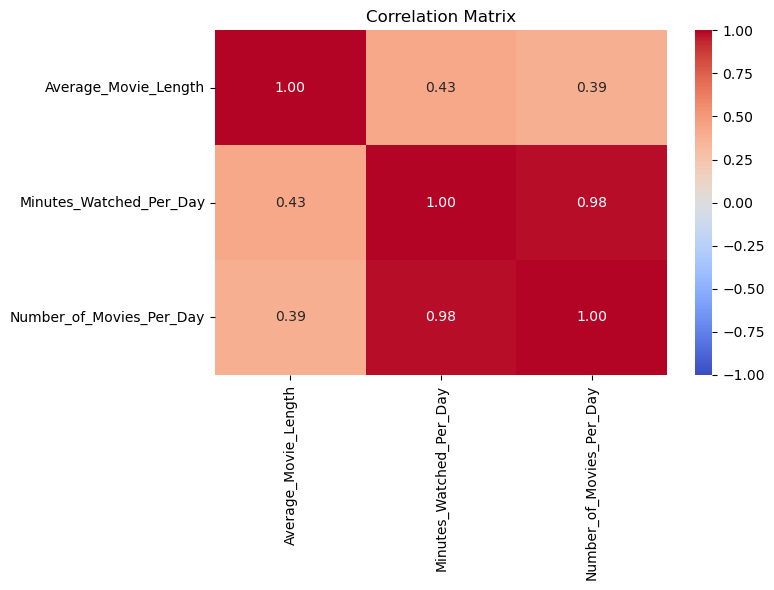

In [14]:
movies_per_day = results_df['Movies Watched per Day']

data = {
    'Average_Movie_Length': avg_length_per_range,
    'Minutes_Watched_Per_Day': minutes_per_day_per_range,
    'Number_of_Movies_Per_Day': movies_per_day
}

df = pd.DataFrame(data, columns=['Average_Movie_Length', 'Minutes_Watched_Per_Day', 'Number_of_Movies_Per_Day'])

correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()



Hypothesis 1
Null Hypothesis: Location (Istanbul, Izmir) has no effect on minutes watched per day
significance level = 0.05
As p-value = 1.4218138770203567e-07 is less than significance level my null hypothesis is rejected thus implying that location has an effect on minutes watched per day.

In [15]:
istanbul_days, izmir_days = [], []
istanbul_minutes, izmir_minutes = [], []

for (start_date, end_date), name in zip(date_ranges, custom_names):
    start = datetime.strptime(start_date, "%Y-%m-%d")
    end = datetime.strptime(end_date, "%Y-%m-%d")

    total_days = (end - start).days + 1

    if name.endswith("(Istanbul)"):
        istanbul_days.extend(pd.date_range(start=start, end=end))
        istanbul_filtered_data = merged_df.loc[(merged_df['Watch Date'] >= start) & (merged_df['Watch Date'] <= end)]
        istanbul_daily_minutes = istanbul_filtered_data.groupby('Watch Date')['Length_Minutes'].sum().reindex(pd.date_range(start=start, end=end), fill_value=0).tolist()
        istanbul_minutes.extend(istanbul_daily_minutes)
    elif name.endswith("(Izmir)"):
        izmir_days.extend(pd.date_range(start=start, end=end))
        izmir_filtered_data = merged_df.loc[(merged_df['Watch Date'] >= start) & (merged_df['Watch Date'] <= end)]
        izmir_daily_minutes = izmir_filtered_data.groupby('Watch Date')['Length_Minutes'].sum().reindex(pd.date_range(start=start, end=end), fill_value=0).tolist()
        izmir_minutes.extend(izmir_daily_minutes)

overall_minutes = istanbul_minutes + izmir_minutes

from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(istanbul_minutes, izmir_minutes)

significance = 0.05

print("P-value is ", p_value)

if p_value < significance:
    print("Reject Null Hypothesis: Location has a significant effect on minutes watched.")
else:
    print("Accept Null Hypothesis: Location has no significant effect on minutes watched.")

P-value is  1.4218138770203567e-07
Reject Null Hypothesis: Location has a significant effect on minutes watched.


Hypothesis 2
Null Hypothesis: Minutes watched per day has no effect on avg length of movies (excluding periods with 0 movies watched)
significance level = 0.05
As p-value = 0.06781946169577907 is more than significance level my null hypothesis is not rejected thus implying that minutes watched per day has no effect on avg length of movies when we do not consider the days/periods without a movie watched.

In [16]:
merged_df['Watch Date'] = pd.to_datetime(merged_df['Watch Date'])

resampled_data = merged_df.resample('7D', on='Watch Date')['Length_Minutes'].sum()
num_movies_per_week = merged_df.resample('7D', on='Watch Date').size()

avg_length_per_week = resampled_data / num_movies_per_week

avg_length_per_week = avg_length_per_week.fillna(0)

avg_length_list = avg_length_per_week.tolist()

total_minutes_per_week = merged_df.resample('D', on='Watch Date')['Length_Minutes'].sum().resample('7D').sum()

num_days_per_week = merged_df.resample('D', on='Watch Date').size().resample('7D').count()

minutes_per_day_per_week = total_minutes_per_week / num_days_per_week

minutes_per_day_list = minutes_per_day_per_week.tolist()

In [17]:
from scipy.stats import pearsonr

non_zero_minutes = [m for m in minutes_per_day_list if m != 0.0]
non_zero_lengths = [l for l in avg_length_list if l != 0.0]

corr, p_value = pearsonr(non_zero_minutes, non_zero_lengths)

alpha = 0.05


print(f"P-value: {p_value}")

if p_value < alpha:
    print("There is a significant relationship between non-zero Minutes watched per day and average length of movies.")
else:
    print("There is no significant relationship between non-zero Minutes watched per day and average length of movies.")

P-value: 0.06781946169577907
There is no significant relationship between non-zero Minutes watched per day and average length of movies.
